In [1]:
import numpy as np 
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model as lm 

In [5]:
#διαβάζουμε το αρχείο μέσω της βιβλιοθήκης pandas
conc_data=pd.read_csv("concretedata1.csv")

FileNotFoundError: [Errno 2] File b'concretedata1.csv' does not exist: b'concretedata1.csv'

In [2]:
#προσθέτουμε στο αρχείο τους τίτλους των στηλών 
names = ['cement', 'slag', 'fly ash', 'water', 'superplasticize', 'aggregate', 'fine aggregate', 'age', 'strength']
conc_data=pd.read_csv("concretedata1.csv", names=names)

NameError: name 'pd' is not defined

In [124]:
#εμφανίζουμε τα πρώτα 5 δείγματα 
conc_data.head()

,cement,slag,fly ash,water,superplasticize,aggregate,fine aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [125]:
#από τα δεδομένα μας εισάγουμε όλες τις στήλες στο διάνυσμα χ εκτόσ της strength την οποία εισάγουμε στο διάνυσμα y
y=conc_data["strength"]
x=conc_data.drop(["strength"], axis=1)

In [126]:
#υπολογίζουμε το 70% του dataset για την εκπαίδευση ενώ το 30% το χρησιμοποιούμε γθα αξιολόγηση
#εμφανίζουμε τα αποτελέσματα 
a=len(conc_data)
test_samples=int(a*0.3)
print("training_samples:", a-test_samples)
print("test_samples:", test_samples)

training_samples: 721
test_samples: 309


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# φτιάχνουμε τον corralation matrix
x_array=x.values
y_array=y.values
rho = np.zeros(x_array.shape[1])
for i in range(x_array.shape[1]):
    rho[i] = (np.corrcoef(x_array[:, i], y_array[:]))[0, 1]
print("\nthe corralation matrix is\n")
print(rho)


the corralation matrix is

[ 0.49783192  0.13482926 -0.10575492 -0.28963338  0.36607883 -0.16493461
 -0.16724125  0.328873  ]


In [129]:
#χωρίζουμε τα δεδομένα σε (x_train, y_train )και (x_test, y_test)
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=test_samples, random_state=100)


In [130]:
from sklearn.linear_model import LinearRegression
#Από τη βιβλιοθήκη scikit-learn εισάγουμε το μοντέλο γραμμικής παλινδρόμησης
model = LinearRegression()
model.fit(x_train, y_train)
#Εκτυπώνουμε το score (R2 value)-ακρίβεια του μοντέλου μας πάνω στο σετ εκπαίδευσης
print("OLS Training score:",model.score(x_train,y_train))

OLS Training score: 0.6023620773405807


In [131]:
#Αυτό που μας ενδιαφέρει όμως κυρίως είναι το σκορ του μοντέλου μας στο σετ αξιολόγησης 
print("OLS Test score:",model.score(x_test,y_test))

OLS Test score: 0.6339345298633021


In [132]:
#ελαχιστα τετραγωνα
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Στο διάνυσμα y_pred βάζουμε τις τιμές που προέβλεψε το μοντέλο μας ώστε να υπολογί
y_pred = model.predict(x_test)
model_mse = mean_squared_error(y_pred, y_test)
model_mae = mean_absolute_error(y_pred,y_test)
print("OLS MSE:",model_mse)
print("OLS MAE:",model_mae)
#δημιουργουμε και εκτυπώνουμε τη συνάρτηση υπολογισμού του MAPE
def mean_absolute_percentage_error(y_test, y_pred):
 y_test, y_pred = np.array(y_test), np.array(y_pred)
 return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("OLS MAPE:",mean_absolute_percentage_error(y_test,y_pred))

OLS MSE: 111.58365468997785
OLS MAE: 8.342233987943214
OLS MAPE: 31.7968242116991


In [133]:
#Δημιουργούμε ένα μοντέλο Ridge Regression 
from sklearn.linear_model import Ridge
#Δημιουργούμε ένα array με πιθανές τιμές του alpha(λ) με τις οποίες  υπολογίζουμε  το MSE και να εκτυπώσουμε αυτη την οποία 
#αντιστοιχεί και το μικρότερο MSE, επιλέγουμε έτσι το καλύτερο μοντέλο 
alphas = np.array([0.01,0.03,0.05,0.06,0.9,0.20,0.50,1.50,2.50,100])
min = 200
pos = 0
for i in range(0,10):
 ridge_reg=Ridge(alpha=alphas[i])
 ridge_reg.fit(x_train,y_train)
 y_pred = ridge_reg.predict(x_test)
 model_mse = mean_squared_error(y_pred, y_test)
 print("With alpha:",alphas[i],"MSE:",model_mse)
 
if(model_mse<=min):
    min=model_mse
    pos=alphas[i]
    print('\n')
print("Lowest MSE:",min,"with alpha:",pos)

 

With alpha: 0.01 MSE: 111.58365321328137
With alpha: 0.03 MSE: 111.58365025990982
With alpha: 0.05 MSE: 111.58364730656696
With alpha: 0.06 MSE: 111.58364582990627
With alpha: 0.9 MSE: 111.58352181597098
With alpha: 0.2 MSE: 111.5836251574084
With alpha: 0.5 MSE: 111.58358086392501
With alpha: 1.5 MSE: 111.58343326551504
With alpha: 2.5 MSE: 111.58328573866989
With alpha: 100.0 MSE: 111.56923997229693


Lowest MSE: 111.56923997229693 with alpha: 100.0


In [2]:
 #υπολογίζουμε τισ μετρικές για το α που επιλέξαμε
ridge = lm.Ridge(alpha=100)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
mse_ridge = mean_squared_error(y_pred, y_test)
mae_ridge = np.mean(np.fabs(y_test - y_pred))
mape_ridge=mean_absolute_percentage_error(y_test,y_pred)
print("MSE: %f" % (mse_ridge))
print("MAE: %f" % (mae_ridge))
print("MAPE: %f"% (mape_ridge))
mae_perc = 100.0 * mae_ridge/average(y)
print("Average price in test set: %f\nError percentage: %f %%\n" % (average(y), mae_perc))
# Vector w=[w_1, w_2, ..., w_p]. Ridge regression results in smaller weights.
print(ridge.coef_)
# Intercept term, w_0
print(ridge.intercept_)

NameError: name 'x_train' is not defined

In [135]:
from sklearn.linear_model import Lasso
alphas = np.array([0.01,0.03,0.05,0.06,0.9,0.20,0.50,1.50,2.50,100])
min = 200
pos = 0
for i in range(0,10):
 lasso_reg=Lasso(alpha=alphas[i])
 lasso_reg.fit(x_train,y_train)
 y_pred = lasso_reg.predict(x_test)
 model_mse = mean_squared_error(y_pred, y_test)
 print("With alpha:",alphas[i],"MSE:",model_mse)

 if(model_mse<=min):
    min=model_mse
    pos=alphas[i]
    print('\n')
print("Lowest MSE:",min,"with alpha:",pos)

With alpha: 0.01 MSE: 111.58208619566274


With alpha: 0.03 MSE: 111.57898028111377


With alpha: 0.05 MSE: 111.57591777604091


With alpha: 0.06 MSE: 111.57440204870933


With alpha: 0.9 MSE: 111.48444049891977


With alpha: 0.2 MSE: 111.55428154888779
With alpha: 0.5 MSE: 111.51807584504301
With alpha: 1.5 MSE: 111.4652753947825


With alpha: 2.5 MSE: 111.51663191041914
With alpha: 100.0 MSE: 169.22967917707047
Lowest MSE: 111.4652753947825 with alpha: 1.5


In [136]:
#υπολογίζουμε τισ μετρικές για το α που επιλέξαμε
lasso = lm.Lasso(alpha=1.5)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
mse_lasso = np.mean((y_test - y_pred) ** 2)
mae_lasso = np.mean(np.fabs(y_test - y_pred))
mape_lasso=mean_absolute_percentage_error(y_test,y_pred)
print("MSE: %f" % (mse_lasso))
print("MAE: %f" % (mae_lasso))
print("MAPE: %f"% (mape_lasso))
average_y = np.mean(y_test)
mae_perc = 100.0 * mae_lasso/average_y
print("Average price in test set: %f\nError percentage: %f %%\n" % (average_y, mae_perc))
# Vector w=[w_1, w_2, ..., w_p]. LASSO results in sparse weight vector.
print(lasso.coef_)
# Intercept term, w_0
print(lasso.intercept_)


MSE: 111.465275
MAE: 8.332400
MAPE: 31.854317
Average price in test set: 35.746861
Error percentage: 23.309460 %

[ 0.11879467  0.09345006  0.08890444 -0.14403222  0.25237825  0.01548379
  0.01808752  0.10797642]
-18.72225621590399


In [137]:
#ΕΡΩΤΗΜΑ 1.3
#Χωρίζουμε και πάλι το dataset σε train και test set αλλα τώρα επιλέγουμε με τυχαίο τρόπο το 70% του συνόλου δεδομένων
# για εκπαίδευση και το 30% για αξιολόγηση 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_samples)

In [150]:
#Ανακατεύουμε  τυχαία 10 φορές το dataset, δημιουργούμε κάθε φορά ένα μοντέλο εκτυπώνουμε τα MSE, MAE, MAPE
#ελάχιστα τετράγωνα

n_iter = 10
mse = np.zeros(n_iter)
mae = np.zeros(n_iter)
mape = np.zeros(n_iter)
for i in range(n_iter):
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_samples)

 model2 = LinearRegression()
 model2.fit(x_train, y_train)

 y_pred_model2 = model2.predict(x_test)

 mse[i] = mean_squared_error(y_pred_model2, y_test)
 mae[i] = mean_absolute_error(y_pred_model2, y_test)
 mape[i] = mean_absolute_percentage_error(y_test,y_pred_model2)

mse_ols = np.mean(mse[i])
mse_ols_std = np.std(mse[i])
mae_ols = np.mean(mae[i])
mae_ols_std = np.std(mae[i])
mape_ols=np.mean(mape[i])
mape_ols_std=np.std(mape[i])
print("Average over " + str(n_iter) + " runs:")
print("MSE: %f (%f) " % (mse_ols, mse_ols_std))
print("MAE: %f (%f) " % (mae_ols, mae_ols_std))
print("MAPE: %f (%f) " % (mape_ols,mape_ols_std))

Average over 10 runs:
MSE: 121.443471 (0.000000) 
MAE: 8.692850 (0.000000) 
MAPE: 30.109496 (0.000000) 


In [153]:
#ridge
n_iter = 10
mse = np.zeros(n_iter)
mae = np.zeros(n_iter)
mape = np.zeros(n_iter)
for i in range(n_iter):
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_samples)

 model_ridge2 = Ridge()
 model_ridge2.fit(x_train, y_train)

 y_pred_model_ridge2 = model_ridge2.predict(x_test)

 mse[i] = mean_squared_error(y_pred_model_ridge2, y_test)
 mae[i] = mean_absolute_error(y_pred_model_ridge2, y_test)
 mape[i] = mean_absolute_percentage_error(y_test,y_pred_model_ridge2)

mse_ridge2 = np.mean(mse[i])
mse_ridge2_std = np.std(mse[i])
mae_ridge2 = np.mean(mae[i])
mae_ridge2_std = np.std(mae[i])
mape_ridge2=np.mean(mape[i])
mape_ridge2_std=np.std(mape[i])
print("Average over " + str(n_iter) + " runs:")
print("MSE: %f (%f) " % (mse_ridge2, mse_ridge2_std))
print("MAE: %f (%f) " % (mae_ridge2, mae_ridge2_std))
print("MAPE: %f (%f) " % (mape_ridge2,mape_ridge2_std))


Average over 10 runs:
MSE: 116.717316 (0.000000) 
MAE: 8.485533 (0.000000) 
MAPE: 32.402973 (0.000000) 


In [154]:
#lasso
n_iter = 10
mse = np.zeros(n_iter)
mae = np.zeros(n_iter)
mape = np.zeros(n_iter)
for i in range(n_iter):
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_samples)

 model_lasso2 = Lasso()
 model_lasso2.fit(x_train, y_train)

 y_pred_model_lasso2 = model_lasso2.predict(x_test)

 mse[i] = mean_squared_error(y_pred_model_lasso2, y_test)
 mae[i] = mean_absolute_error(y_pred_model_lasso2, y_test)
 mape[i] = mean_absolute_percentage_error(y_test,y_pred_model_lasso2)

mse_lasso2 = np.mean(mse[i])
mse_lasso2_std = np.std(mse[i])
mae_lasso2 = np.mean(mae[i])
mae_lasso2_std = np.std(mae[i])
mape_lasso2=np.mean(mape[i])
mape_lasso2_std=np.std(mape[i])
print("Average over " + str(n_iter) + " runs:")
print("MSE: %f (%f) " % (mse_lasso2, mse_lasso2_std))
print("MAE: %f (%f) " % (mae_lasso2, mae_lasso2_std))
print("MAPE: %f (%f) " % (mape_lasso2,mape_lasso2_std))

Average over 10 runs:
MSE: 113.457096 (0.000000) 
MAE: 8.430141 (0.000000) 
MAPE: 29.448395 (0.000000) 


In [18]:
#ΕΡΩΤΗΜΑ 1.4
#Επαναφέρουμε το dataset στην αρχική του κατάσταση
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_samples, random_state=0)

In [19]:
#Δημιουργούμε ένα μοντέλο polynomial linear regression δευτέρου βαθμού
#Υπολογίζουμε και εκτυπώνουμε την ακρίβεια στο training set
from sklearn.preprocessing import PolynomialFeatures
pol= PolynomialFeatures(degree=2,include_bias=False)
#Στο x_train πλεον προσθέσαμε τετράγωνα των  τιμών
#χρησιμοποιούμε  x_pol2  για να προβλέψουμε τις τιμές του x_test

x_pol = pol.fit_transform(x_train)
x_pol2 = pol.fit_transform(x_test)



In [20]:
model_lin = LinearRegression()
model_lin.fit(x_pol, y_train)
model_lin.score(x_pol,y_train)

0.8226915548300837

In [22]:
#Το διάνυσμα y_pred3  ειναι  προβλέψεις του δευτεροβάθμιου μοντέλου 
y_pred3 = model_lin.predict(x_pol2)
print("MSE of 2nd degree model:",mean_squared_error(y_pred3,y_test))
print("MAE of 2nd degree model:",mean_absolute_error(y_pred3,y_test))

MSE of 2nd degree model: 61.92016986349087
MAE of 2nd degree model: 5.996021785208871


Best degree 3 with RMSE 7.212523702265063


[]

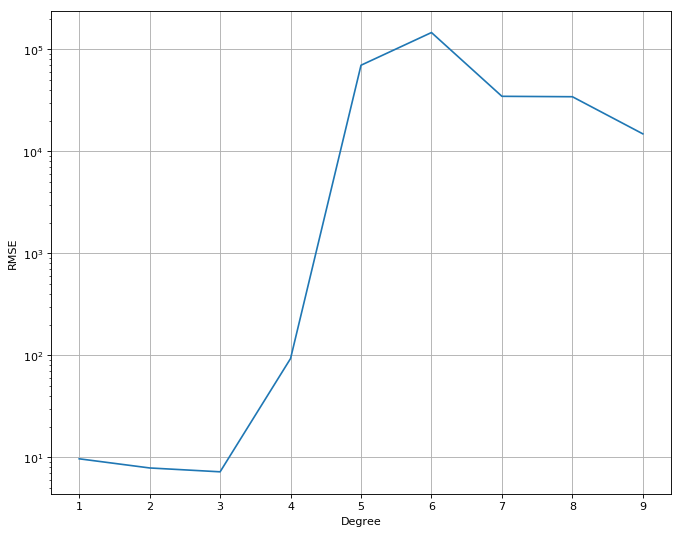

In [23]:
#Με μία επαναλήπτική διαδικασία υπολογίζουμε για κάθε βαθμό(0-10) το RMSE και εκτυπώνουμε το ελάχιστο

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0
for deg in degrees:
 # Train features
 pol_f = PolynomialFeatures(degree=deg, include_bias=False)
 x_pol_train = pol_f.fit_transform(x_train)
 # Linear regression
 pol_reg = LinearRegression()
 pol_reg.fit(x_pol_train, y_train)
 # Compare with test data
 x_pol_test = pol_f.fit_transform(x_test)
 pol_predict = pol_reg.predict(x_pol_test)
 pol_mse = mean_squared_error(y_test, pol_predict)
 pol_rmse = np.sqrt(pol_mse)
 rmses.append(pol_rmse)
 # Cross-validation of degree
 if min_rmse > pol_rmse:
    min_rmse = pol_rmse
    min_deg = deg
 # Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
fig=plt.figure(figsize=(10, 8), dpi= 80)
a = fig.add_subplot(111)
a.plot(degrees, rmses)
a.set_yscale('log')
a.set_xlabel('Degree')
a.set_ylabel('RMSE')
a.grid()
a.plot()

Best degree 3 with MSE 52.02049815573533


[]

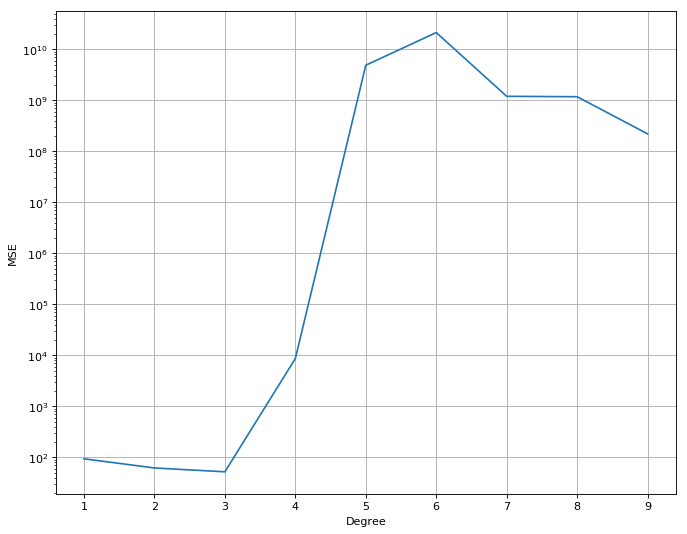

In [30]:
mses = []
degrees = np.arange(1, 10)
min_mse, min_deg = 1e10, 0
for deg in degrees:
 # Train features
 pol_f = PolynomialFeatures(degree=deg, include_bias=False)
 x_pol_train = pol_f.fit_transform(x_train)
 # Linear regression
 pol_reg = LinearRegression()
 pol_reg.fit(x_pol_train, y_train)
 # Compare with test data
 x_pol_test = pol_f.fit_transform(x_test)
 pol_predict = pol_reg.predict(x_pol_test)
 pol_mse = mean_squared_error(y_test, pol_predict)
 
 mses.append(pol_mse)
 # Cross-validation of degree
 if min_mse > pol_mse:
    min_mse = pol_mse
    min_deg = deg
 # Plot and present results
print('Best degree {} with MSE {}'.format(min_deg, min_mse))
fig=plt.figure(figsize=(10, 8), dpi= 80)
a = fig.add_subplot(111)
a.plot(degrees, mses)
a.set_yscale('log')
a.set_xlabel('Degree')
a.set_ylabel('MSE')
a.grid()
a.plot()